<a href="https://colab.research.google.com/github/mirzaie-mehdi/Data_Science/blob/main/Elementary_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install scanpy
import scanpy as sc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.1/96.1 KB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 67.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 48.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.0/296.0 KB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 51.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 KB 6.5 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=52ecd4e0821449fabb61c535b99cfefe3f3c49ee85cdd

In [ ]:
datah5ad = sc.read_h5ad('/content/drive/MyDrive/Gut_Atlas_Sc/Full_obj_log_counts_soupx_v2.h5ad')

In [ ]:
datah5ad

AnnData object with n_obs × n_vars = 428469 × 30535
    obs: 'Sample name', 'Diagnosis', 'Age', 'sample name', 'Region code', 'Fraction', 'Gender', 'Region', '10X', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_scores', 'predicted_doublets', 'category', 'Age_group', 'Integrated_05'
    var: 'gene_ids', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'
    uns: 'Integrated_colors', 'category2_colors', 'category_colors', "dendrogram_['Integrated']", "dendrogram_['Integrated_05']", 'hvg', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'

In [ ]:
datah5ad.obs.Gender

AAACCTGAGAACAACT-1-4918STDY7333456    M
AAACCTGAGCGATATA-1-4918STDY7333456    M
AAACCTGAGGAGTTTA-1-4918STDY7333456    M
AAACCTGAGTATCTCG-1-4918STDY7333456    M
AAACCTGAGTGACTCT-1-4918STDY7333456    M
                                     ..
TTTGGTTTCAACACGT-1-WTDAtest7770719    F
TTTGGTTTCCAAATGC-1-WTDAtest7770719    F
TTTGGTTTCGGCGGTT-1-WTDAtest7770719    F
TTTGTCAGTGAAAGAG-1-WTDAtest7770719    F
TTTGTCATCTTGACGA-1-WTDAtest7770719    F
Name: Gender, Length: 428469, dtype: category
Categories (2, object): ['F', 'M']

In [ ]:
a = [3, 3, 4, 5]
np.mean(a)

3.75

In [ ]:
a = np.array([1, 2, 3, 4, 5])

In [ ]:
a[1::2]

array([2, 4])

In [ ]:
np.zeros(shape=(2,3,3),dtype=float)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [ ]:
np.ones(shape=(1,6))

array([[1., 1., 1., 1., 1., 1.]])

In [ ]:
np.full(shape=(3,4), fill_value=4.3)

array([[4.3, 4.3, 4.3, 4.3],
       [4.3, 4.3, 4.3, 4.3],
       [4.3, 4.3, 4.3, 4.3]])

In [ ]:
np.empty(shape=(4,5))

array([[2.58630164e-316, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000]])

In [ ]:
z = np.zeros(shape=(3,3,3))
x = np.full_like(z,11.2)
x

array([[[11.2, 11.2, 11.2],
        [11.2, 11.2, 11.2],
        [11.2, 11.2, 11.2]],

       [[11.2, 11.2, 11.2],
        [11.2, 11.2, 11.2],
        [11.2, 11.2, 11.2]],

       [[11.2, 11.2, 11.2],
        [11.2, 11.2, 11.2],
        [11.2, 11.2, 11.2]]])

In [ ]:
np.ones_like(x)

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [ ]:
np.pi

3.141592653589793

In [ ]:
np.e

2.718281828459045

In [ ]:
np.exp(3)

20.085536923187668

In [ ]:
np.inf

inf

In [ ]:
np.NINF

-inf

In [ ]:
np.PZERO

0.0

In [ ]:
np.array([1,2,3])/np.NINF

array([-0., -0., -0.])

In [ ]:
ç

<ipython-input-22-e342779099f5>:1: RuntimeWarning: divide by zero encountered in log
  np.log([-1,0,np.inf])
<ipython-input-22-e342779099f5>:1: RuntimeWarning: invalid value encountered in log
  np.log([-1,0,np.inf])


array([ nan, -inf,  inf])

In [ ]:
np.isnan(np.log([-1,0,np.inf]))

<ipython-input-23-a024ce4d330c>:1: RuntimeWarning: divide by zero encountered in log
  np.isnan(np.log([-1,0,np.inf]))
<ipython-input-23-a024ce4d330c>:1: RuntimeWarning: invalid value encountered in log
  np.isnan(np.log([-1,0,np.inf]))


array([ True, False, False])

In [ ]:
np.isinf(np.log([-1,0,np.inf]))

<ipython-input-24-eea08892f7c1>:1: RuntimeWarning: divide by zero encountered in log
  np.isinf(np.log([-1,0,np.inf]))
<ipython-input-24-eea08892f7c1>:1: RuntimeWarning: invalid value encountered in log
  np.isinf(np.log([-1,0,np.inf]))


array([False,  True,  True])

In [ ]:
np.isfinite(np.log([-1,0,np.inf,2]))

<ipython-input-26-c5694f473f4f>:1: RuntimeWarning: divide by zero encountered in log
  np.isfinite(np.log([-1,0,np.inf,2]))
<ipython-input-26-c5694f473f4f>:1: RuntimeWarning: invalid value encountered in log
  np.isfinite(np.log([-1,0,np.inf,2]))


array([False, False, False,  True])

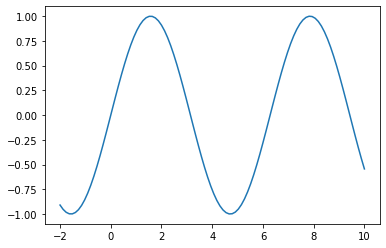

In [ ]:
x = np.linspace(-2, 10, 100)
y = np.sin(x)
plt.plot(x,y)

In [ ]:
np.logspace(0, 3, 4)

array([   1.,   10.,  100., 1000.])

In [ ]:
np.geomspace(1, 1000, 3)

array([   1.       ,   31.6227766, 1000.       ])

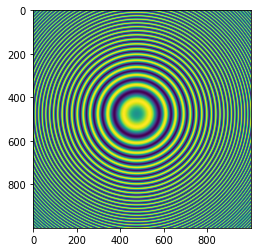

In [ ]:
x = np.linspace(-10, 11, 1000)
y = np.linspace(-10, 11, 1000)
X, Y = np.meshgrid(x,y)
Z = np.sin(X**2 + Y**2)
plt.imshow(Z)


In [ ]:
x = 10.3
np.floor(x)

10.0

In [ ]:
x = np.arange(1, 11, 1)

In [ ]:
x.sum()
np.sum(x)

55

In [ ]:
np.diff(x)

array([1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
np.prod(x)

3628800

In [ ]:
np.divide(x,2)

array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [ ]:
np.power(x,1/3)

array([1.        , 1.25992105, 1.44224957, 1.58740105, 1.70997595,
       1.81712059, 1.91293118, 2.        , 2.08008382, 2.15443469])

In [ ]:
np.mod(x,3)

array([1, 2, 0, 1, 2, 0, 1, 2, 0, 1])

In [ ]:
x = np.arange(0, 2*np.pi, np.pi)
x

array([0.        , 3.14159265])

In [ ]:
x = np.linspace(0,np.pi,100)

In [ ]:
x = np.arange(0, 9, 1)
x = x.reshape(3,3)
print(x)
np.sum(x, axis = 0)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


array([ 9, 12, 15])

In [ ]:
np.histogram(x, bins=10)

(array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]))

In [ ]:
x = np.array([-6, 1, 5, 7, 32, 0])

In [ ]:
np.sort(x)

array([-6,  0,  1,  5,  7, 32])

In [ ]:
np.sort(x)[::-1]

array([32,  7,  5,  1,  0, -6])

In [ ]:
np.argsort(x)

array([0, 5, 1, 2, 3, 4])

In [ ]:
np.argmax(x)

4

In [ ]:
np.extract(x>1,x)

array([ 5,  7, 32])

In [ ]:
np.where(x>1)

(array([2, 3, 4]),)

In [ ]:
np.random.normal(0, 1)

-0.5529567851341974

(array([  3.,   7.,  42., 124., 220., 253., 198., 105.,  39.,   9.]),
 array([135.28567441, 141.73773392, 148.18979342, 154.64185292,
        161.09391243, 167.54597193, 173.99803144, 180.45009094,
        186.90215045, 193.35420995, 199.80626945]),
 <a list of 10 Patch objects>)

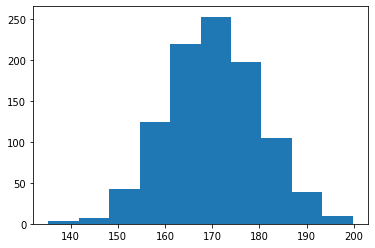

In [ ]:
x = np.random.normal(170,10,1000)
plt.hist(x)

(array([ 97.,  88.,  92., 109., 105., 112.,  85., 102.,  96., 114.]),
 array([4.09888402e-04, 1.00151411e-01, 1.99892934e-01, 2.99634457e-01,
        3.99375980e-01, 4.99117503e-01, 5.98859026e-01, 6.98600549e-01,
        7.98342072e-01, 8.98083595e-01, 9.97825118e-01]),
 <a list of 10 Patch objects>)

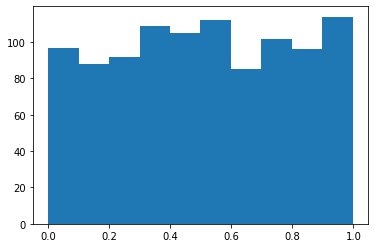

In [ ]:
x = np.random.uniform(0,1,1000)
plt.hist(x)

In [ ]:
df = pd.DataFrame(columns=['A', 'B', 'C'], index=range(5))
df

,A,B,C
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [ ]:
## Data frame
n = 10
Time = np.arange(start = "2021-12-15T12:00", stop = "2021-12-15T22:00", step = np.timedelta64(1,"h"),dtype = "datetime64")
Temp = np.random.normal(17,0.1,n)
Color = np.random.choice(a = ["red","blue","yellow","green"],size = n)

In [ ]:
pd.DataFrame(list(zip(Time,Temp,Color)),columns = ["Time","Temp","Color"])

,Time,Temp,Color
0,2021-12-15 12:00:00,16.930996,green
1,2021-12-15 13:00:00,16.936752,red
2,2021-12-15 14:00:00,16.971559,blue
3,2021-12-15 15:00:00,16.981750,red
4,2021-12-15 16:00:00,16.857262,green
5,2021-12-15 17:00:00,17.036692,red
6,2021-12-15 18:00:00,17.072543,blue
7,2021-12-15 19:00:00,17.093054,blue
8,2021-12-15 20:00:00,17.190639,blue
9,2021-12-15 21:00:00,17.011598,yellow


In [ ]:
dictionary_of_arrays = {
    "Time": Time,
    "Temp": Temp,
    "Color": Color
}
df = pd.DataFrame(dictionary_of_arrays)
df

,Time,Temp,Color
0,2021-12-15 12:00:00,16.930996,green
1,2021-12-15 13:00:00,16.936752,red
2,2021-12-15 14:00:00,16.971559,blue
3,2021-12-15 15:00:00,16.981750,red
4,2021-12-15 16:00:00,16.857262,green
5,2021-12-15 17:00:00,17.036692,red
6,2021-12-15 18:00:00,17.072543,blue
7,2021-12-15 19:00:00,17.093054,blue
8,2021-12-15 20:00:00,17.190639,blue
9,2021-12-15 21:00:00,17.011598,yellow


In [ ]:
pd.read_clipboard()

PyperclipException: ignored

In [ ]:
daata = pd.read_csv("/content/sample_data/california_housing_test.csv")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


In [ ]:
data = pd.read_html("https://en.wikipedia.org/wiki/S%26P_500")
data = data[1]


In [ ]:
data.head()

,Year,Change in Index,"Total Annual Return, Including Dividends","Value of $1.00 Invested on January 1, 1970",5-Year Annualized Return,10-Year Annualized Return,15-Year Annualized Return,20-Year Annualized Return,25-Year Annualized Return
0,1961,23.13%,-,-,-,-,-,-,-
1,1962,-11.81%,-,-,-,-,-,-,-
2,1963,18.89%,-,-,-,-,-,-,-
3,1964,12.97%,-,-,-,-,-,-,-
4,1965,9.06%,-,-,-,-,-,-,-


In [ ]:
data.index

RangeIndex(start=0, stop=65, step=1)

In [ ]:
data.columns

Index(['Year', 'Change in Index', 'Total Annual Return, Including Dividends',
       'Value of $1.00 Invested on January 1, 1970',
       '5-Year Annualized Return', '10-Year Annualized Return',
       '15-Year Annualized Return', '20-Year Annualized Return',
       '25-Year Annualized Return'],
      dtype='object')

In [ ]:
data.to_csv("data.csv")

In [ ]:
data.to_excel("data.xls")

In [ ]:
data = pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)")[0]

In [ ]:
data.head()

,Country / Area,UN continentalregion[4],UN statisticalsubregion[4],Population(1 July 2018),Population(1 July 2019),Change
0,China[a],Asia,Eastern Asia,1427647786,1433783686,+0.43%
1,India,Asia,Southern Asia,1352642280,1366417754,+1.02%
2,United States,Americas,Northern America,327096265,329064917,+0.60%
3,Indonesia,Asia,South-eastern Asia,267670543,270625568,+1.10%
4,Pakistan,Asia,Southern Asia,212228286,216565318,+2.04%


In [ ]:
data["UN continentalregion[4]"]=="Asia"


0       True
1       True
2      False
3       True
4       True
       ...  
229    False
230    False
231    False
232    False
233    False
Name: UN continentalregion[4], Length: 234, dtype: bool

In [ ]:
data[data["UN continentalregion[4]"]=="Asia"]

,Country / Area,UN continentalregion[4],UN statisticalsubregion[4],Population(1 July 2018),Population(1 July 2019),Change
0,China[a],Asia,Eastern Asia,1427647786,1433783686,+0.43%
1,India,Asia,Southern Asia,1352642280,1366417754,+1.02%
3,Indonesia,Asia,South-eastern Asia,267670543,270625568,+1.10%
4,Pakistan,Asia,Southern Asia,212228286,216565318,+2.04%
7,Bangladesh,Asia,Southern Asia,161376708,163046161,+1.03%
10,Japan,Asia,Eastern Asia,127202192,126860301,−0.27%
12,Philippines,Asia,South-eastern Asia,106651394,108116615,+1.37%
14,Vietnam,Asia,South-eastern Asia,95545962,96462106,+0.96%
17,Turkey,Asia,Western Asia,82340088,83429615,+1.32%
18,Iran,Asia,Southern Asia,81800188,82913906,+1.36%


In [ ]:
data[data['UN continentalregion[4]']=="Asia"].iloc[:, [0,4]]

,Country / Area,Population(1 July 2019)
0,China[a],1433783686
1,India,1366417754
3,Indonesia,270625568
4,Pakistan,216565318
7,Bangladesh,163046161
10,Japan,126860301
12,Philippines,108116615
14,Vietnam,96462106
17,Turkey,83429615
18,Iran,82913906


In [ ]:
data.loc[20:25]

,Country / Area,UN continentalregion[4],UN statisticalsubregion[4],Population(1 July 2018),Population(1 July 2019),Change
20,United Kingdom,Europe,Northern Europe,67141684,67530172,+0.58%
21,France[b],Europe,Western Europe,64990511,65129728,+0.21%
22,Italy,Europe,Southern Europe,60627291,60550075,−0.13%
23,South Africa,Africa,Southern Africa,57792518,58558270,+1.33%
24,Tanzania[c],Africa,Eastern Africa,56313438,58005463,+3.00%
25,Myanmar,Asia,South-eastern Asia,53708320,54045420,+0.63%


In [ ]:
data.loc[20:25,['Change','UN continentalregion[4]']]

,Change,UN continentalregion[4]
20,+0.58%,Europe
21,+0.21%,Europe
22,−0.13%,Europe
23,+1.33%,Africa
24,+3.00%,Africa
25,+0.63%,Asia


In [ ]:
data.iloc[20:25,1:4]

Country / Dependency Population               
   Country / Dependency    Numbers % of the world
20               France   67989000            NaN
21       United Kingdom   67026292            NaN
22             Thailand   66880367            NaN
23             Tanzania   61741120            NaN
24         South Africa   60604992            NaN

In [ ]:
data[(data["UN continentalregion[4]"]=="Asia") & (data['Population(1 July 2018)']> 1000000)]

,Country / Area,UN continentalregion[4],UN statisticalsubregion[4],Population(1 July 2018),Population(1 July 2019),Change
0,China[a],Asia,Eastern Asia,1427647786,1433783686,+0.43%
1,India,Asia,Southern Asia,1352642280,1366417754,+1.02%
3,Indonesia,Asia,South-eastern Asia,267670543,270625568,+1.10%
4,Pakistan,Asia,Southern Asia,212228286,216565318,+2.04%
7,Bangladesh,Asia,Southern Asia,161376708,163046161,+1.03%
10,Japan,Asia,Eastern Asia,127202192,126860301,−0.27%
12,Philippines,Asia,South-eastern Asia,106651394,108116615,+1.37%
14,Vietnam,Asia,South-eastern Asia,95545962,96462106,+0.96%
17,Turkey,Asia,Western Asia,82340088,83429615,+1.32%
18,Iran,Asia,Southern Asia,81800188,82913906,+1.36%


In [ ]:
data.drop(index=0,inplace = True)
data.reset_index(drop=True,inplace = True)
data.head()

,Country / Area,UN continentalregion[4],UN statisticalsubregion[4],Population(1 July 2018),Population(1 July 2019),Change
0,India,Asia,Southern Asia,1352642280,1366417754,+1.02%
1,United States,Americas,Northern America,327096265,329064917,+0.60%
2,Indonesia,Asia,South-eastern Asia,267670543,270625568,+1.10%
3,Pakistan,Asia,Southern Asia,212228286,216565318,+2.04%
4,Brazil,Americas,South America,209469323,211049527,+0.75%


In [ ]:
data['Country / Area'].describe()

count       233
unique      233
top       India
freq          1
Name: Country / Area, dtype: object

In [ ]:
data.describe(include = 'all')

,Country / Area,UN continentalregion[4],UN statisticalsubregion[4],Population(1 July 2018),Population(1 July 2019),Change
count,233,232,232,2.330000e+02,2.330000e+02,232
unique,233,5,22,NaN,NaN,186
top,India,Africa,Caribbean,NaN,NaN,+0.73%
freq,1,58,26,NaN,NaN,4
mean,NaN,NaN,NaN,5.936335e+07,6.004387e+07,NaN
std,NaN,NaN,NaN,5.075828e+08,5.130523e+08,NaN
min,NaN,NaN,NaN,8.010000e+02,7.990000e+02,NaN
25%,NaN,NaN,NaN,4.392480e+05,4.403720e+05,NaN
50%,NaN,NaN,NaN,5.453014e+06,5.457013e+06,NaN
75%,NaN,NaN,NaN,1.975147e+07,2.032138e+07,NaN


In [ ]:
data.describe(include = [np.number])

,Population(1 July 2018),Population(1 July 2019)
count,2.330000e+02,2.330000e+02
mean,5.936335e+07,6.004387e+07
std,5.075828e+08,5.130523e+08
min,8.010000e+02,7.990000e+02
25%,4.392480e+05,4.403720e+05
50%,5.453014e+06,5.457013e+06
75%,1.975147e+07,2.032138e+07
max,7.631091e+09,7.713468e+09


In [ ]:
data.describe(exclude = [np.number])

,Country / Area,UN continentalregion[4],UN statisticalsubregion[4],Change
count,233,232,232,232
unique,233,5,22,186
top,India,Africa,Caribbean,+0.73%
freq,1,58,26,4


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Country / Area              233 non-null    object
 1   UN continentalregion[4]     232 non-null    object
 2   UN statisticalsubregion[4]  232 non-null    object
 3   Population(1 July 2018)     233 non-null    int64 
 4   Population(1 July 2019)     233 non-null    int64 
 5   Change                      232 non-null    object
dtypes: int64(2), object(4)
memory usage: 11.0+ KB


In [ ]:
data = pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)")[0]
data.drop(index=0,inplace = True)
data.head()

,Country / Area,UN continentalregion[4],UN statisticalsubregion[4],Population(1 July 2018),Population(1 July 2019),Change
1,India,Asia,Southern Asia,1352642280,1366417754,+1.02%
2,United States,Americas,Northern America,327096265,329064917,+0.60%
3,Indonesia,Asia,South-eastern Asia,267670543,270625568,+1.10%
4,Pakistan,Asia,Southern Asia,212228286,216565318,+2.04%
5,Brazil,Americas,South America,209469323,211049527,+0.75%


In [ ]:
data.reset_index(drop=True,inplace = True)
data.head()

,Country / Area,UN continentalregion[4],UN statisticalsubregion[4],Population(1 July 2018),Population(1 July 2019),Change
0,India,Asia,Southern Asia,1352642280,1366417754,+1.02%
1,United States,Americas,Northern America,327096265,329064917,+0.60%
2,Indonesia,Asia,South-eastern Asia,267670543,270625568,+1.10%
3,Pakistan,Asia,Southern Asia,212228286,216565318,+2.04%
4,Brazil,Americas,South America,209469323,211049527,+0.75%


In [ ]:
data_new = data.iloc[1:]
data_new.head()

,Country / Area,UN continentalregion[4],UN statisticalsubregion[4],Population(1 July 2018),Population(1 July 2019),Change
1,United States,Americas,Northern America,327096265,329064917,+0.60%
2,Indonesia,Asia,South-eastern Asia,267670543,270625568,+1.10%
3,Pakistan,Asia,Southern Asia,212228286,216565318,+2.04%
4,Brazil,Americas,South America,209469323,211049527,+0.75%
5,Nigeria,Africa,Western Africa,195874683,200963599,+2.60%


In [ ]:
data_new.reset_index(drop = True,inplace = True)
data_new.head()

,Country / Area,UN continentalregion[4],UN statisticalsubregion[4],Population(1 July 2018),Population(1 July 2019),Change
0,United States,Americas,Northern America,327096265,329064917,+0.60%
1,Indonesia,Asia,South-eastern Asia,267670543,270625568,+1.10%
2,Pakistan,Asia,Southern Asia,212228286,216565318,+2.04%
3,Brazil,Americas,South America,209469323,211049527,+0.75%
4,Nigeria,Africa,Western Africa,195874683,200963599,+2.60%


In [ ]:
data_new.set_index('Country / Area',inplace = True)
data_new.head()

,UN continentalregion[4],UN statisticalsubregion[4],Population(1 July 2018),Population(1 July 2019),Change
Country / Area,,,,,
United States,Americas,Northern America,327096265,329064917,+0.60%
Indonesia,Asia,South-eastern Asia,267670543,270625568,+1.10%
Pakistan,Asia,Southern Asia,212228286,216565318,+2.04%
Brazil,Americas,South America,209469323,211049527,+0.75%
Nigeria,Africa,Western Africa,195874683,200963599,+2.60%


In [ ]:
data_new.columns


Index(['Country / Area', 'UN continentalregion[4]',
       'UN statisticalsubregion[4]', 'Population(1 July 2018)',
       'Population(1 July 2019)', 'Change'],
      dtype='object')

In [ ]:
data_new.loc['Brazil']

UN continentalregion[4]            Americas
UN statisticalsubregion[4]    South America
Population(1 July 2018)           209469323
Population(1 July 2019)           211049527
Change                               +0.75%
Name: Brazil, dtype: object

In [ ]:
data_new.reset_index(inplace=True)
data_new.head()

,Country / Area,UN continentalregion[4],UN statisticalsubregion[4],Population(1 July 2018),Population(1 July 2019),Change
0,United States,Americas,Northern America,327096265,329064917,+0.60%
1,Indonesia,Asia,South-eastern Asia,267670543,270625568,+1.10%
2,Pakistan,Asia,Southern Asia,212228286,216565318,+2.04%
3,Brazil,Americas,South America,209469323,211049527,+0.75%
4,Nigeria,Africa,Western Africa,195874683,200963599,+2.60%


In [ ]:
## merge teo data frames
df1 = pd.DataFrame({"A":np.arange(15, 18), "B":np.arange(32,35),"C":np.arange(25, 28)})
df1

,A,B,C
0,15,32,25
1,16,33,26
2,17,34,27


In [ ]:
df2 = pd.DataFrame({"A":np.arange(10, 14),"B":np.arange(41,45),"C":np.arange(18,22)})
df2

,A,B,C
0,10,41,18
1,11,42,19
2,12,43,20
3,13,44,21


In [ ]:
df = pd.concat([df1, df2])
df

,A,B,C
0,15,32,25
1,16,33,26
2,17,34,27
0,10,41,18
1,11,42,19
2,12,43,20
3,13,44,21


In [ ]:
df = pd.concat([df1, df2], ignore_index = True)
df

,A,B,C
0,15,32,25
1,16,33,26
2,17,34,27
3,10,41,18
4,11,42,19
5,12,43,20
6,13,44,21


In [ ]:
df = pd.concat([df1, df2], ignore_index = False, keys = ['first','sec'])
df

A   B   C
first 0  15  32  25
      1  16  33  26
      2  17  34  27
sec   0  10  41  18
      1  11  42  19
      2  12  43  20
      3  13  44  21

In [ ]:
df.loc['sec'].iloc[1]

A    11
B    42
C    19
Name: 1, dtype: int64

In [ ]:
df1 = pd.DataFrame({"A":np.arange(15,18), "B":np.arange(32,35),"C":np.arange(25,28)})
df1

,A,B,C
0,15,32,25
1,16,33,26
2,17,34,27


In [ ]:
df2 = pd.DataFrame({"O":np.arange(10,13), "E":np.arange(41,44),"F":np.arange(18,21)})
df2

,O,E,F
0,10,41,18
1,11,42,19
2,12,43,20


In [ ]:
pd.concat([df1,df2], axis=1)

,A,B,C,O,E,F
0,15,32,25,10,41,18
1,16,33,26,11,42,19
2,17,34,27,12,43,20


In [ ]:
df1.join(df2)

,A,B,C,O,E,F
0,15,32,25,10,41,18
1,16,33,26,11,42,19
2,17,34,27,12,43,20


In [ ]:
df2.join(df1)

,O,E,F,A,B,C
0,10,41,18,15,32,25
1,11,42,19,16,33,26
2,12,43,20,17,34,27


In [ ]:
df1 = pd.DataFrame({
    "Time":["H1","H2","H3","H4"],
    "Temp":["14","18","22","21"],
    "Color":["B","B","R","Y"]
})
df1

,Time,Temp,Color
0,H1,14,B
1,H2,18,B
2,H3,22,R
3,H4,21,Y


In [ ]:
df2 = pd.DataFrame({
    "Time":["H1","H2","H3","H4"],
    "Windspeed":["20","26","30","33"],
    "Loudness":["Low","Medium","High","High"]
})
df2

,Time,Windspeed,Loudness
0,H1,20,Low
1,H2,26,Medium
2,H3,30,High
3,H4,33,High


In [ ]:
result = pd.merge(df1, df2, on = "Time")
result

,Time,Temp,Color,Windspeed,Loudness
0,H1,14,B,20,Low
1,H2,18,B,26,Medium
2,H3,22,R,30,High
3,H4,21,Y,33,High


In [ ]:
df1 = pd.DataFrame({
    "Time":["H1","H2","H3","H4","H5"],
    "Temp":["14","18","22","21","19"],
    "Color":["B","B","R","Y","Y"]
})
df1

,Time,Temp,Color
0,H1,14,B
1,H2,18,B
2,H3,22,R
3,H4,21,Y
4,H5,19,Y


In [ ]:
df2 = pd.DataFrame({
    "Time":["H1","H2","H3","H4","H6"],
    "Windspeed":["20","26","30","33","25"],
    "Loudness":["Low","Medium","High","High","Meduim"]
})
df2

,Time,Windspeed,Loudness
0,H1,20,Low
1,H2,26,Medium
2,H3,30,High
3,H4,33,High
4,H6,25,Meduim


In [ ]:
result = pd.merge(df1, df2, on ="Time")
result

,Time,Temp,Color,Windspeed,Loudness
0,H1,14,B,20,Low
1,H2,18,B,26,Medium
2,H3,22,R,30,High
3,H4,21,Y,33,High


In [ ]:
result = pd.merge(df1, df2, on ="Time", how = "inner")
result

,Time,Temp,Color,Windspeed,Loudness
0,H1,14,B,20,Low
1,H2,18,B,26,Medium
2,H3,22,R,30,High
3,H4,21,Y,33,High


In [ ]:
result = pd.merge(df1, df2, on ="Time", how = "outer")
result

,Time,Temp,Color,Windspeed,Loudness
0,H1,14,B,20,Low
1,H2,18,B,26,Medium
2,H3,22,R,30,High
3,H4,21,Y,33,High
4,H5,19,Y,NaN,NaN
5,H6,NaN,NaN,25,Meduim


In [ ]:
HR = pd.read_csv('/content/drive/MyDrive/SciSchool/data/WA_Fn-UseC_-HR-Employee-Attrition.csv')
HR.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
HR.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [ ]:
HR['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [ ]:
HR['EducationField'].nunique()

6

In [ ]:
HR['Age'].mean()

36.923809523809524

In [ ]:
HR.mean(numeric_only=True,axis = 0)

Age                            36.923810
DailyRate                     802.485714
DistanceFromHome                9.192517
Education                       2.912925
EmployeeCount                   1.000000
EmployeeNumber               1024.865306
EnvironmentSatisfaction         2.721769
HourlyRate                     65.891156
JobInvolvement                  2.729932
JobLevel                        2.063946
JobSatisfaction                 2.728571
MonthlyIncome                6502.931293
MonthlyRate                 14313.103401
NumCompaniesWorked              2.693197
PercentSalaryHike              15.209524
PerformanceRating               3.153741
RelationshipSatisfaction        2.712245
StandardHours                  80.000000
StockOptionLevel                0.793878
TotalWorkingYears              11.279592
TrainingTimesLastYear           2.799320
WorkLifeBalance                 2.761224
YearsAtCompany                  7.008163
YearsInCurrentRole              4.229252
YearsSinceLastPr

In [ ]:
HR.sort_values(by = 'Age',ascending =False)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1209,60,No,Travel_Rarely,370,Research & Development,1,4,Medical,1,1697,...,3,80,1,19,2,4,1,0,0,0
427,60,No,Travel_Frequently,1499,Sales,28,3,Marketing,1,573,...,4,80,0,22,5,4,18,13,13,11
536,60,No,Travel_Rarely,1179,Sales,16,4,Marketing,1,732,...,4,80,0,10,1,3,2,2,2,2
411,60,No,Travel_Rarely,422,Research & Development,7,3,Life Sciences,1,549,...,4,80,0,33,5,1,29,8,11,10
879,60,No,Travel_Rarely,696,Sales,7,4,Marketing,1,1233,...,2,80,1,12,3,3,11,7,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,18,No,Non-Travel,1124,Research & Development,1,3,Life Sciences,1,1368,...,3,80,0,0,5,4,0,0,0,0
457,18,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,1,614,...,4,80,0,0,3,3,0,0,0,0
828,18,Yes,Non-Travel,247,Research & Development,8,1,Medical,1,1156,...,4,80,0,0,0,3,0,0,0,0
1153,18,Yes,Travel_Frequently,544,Sales,3,2,Medical,1,1624,...,3,80,0,0,2,4,0,0,0,0


In [ ]:
HR.sort_values(['Age','YearsAtCompany'],ascending = (False,True))[['Age','YearsAtCompany']]

,Age,YearsAtCompany
1209,60,1
536,60,2
879,60,11
427,60,18
411,60,29
...,...,...
727,18,0
828,18,0
972,18,0
1153,18,0


In [ ]:
HR.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
HR.groupby(by = 'Attrition').count()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,
No,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,...,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233
Yes,237,237,237,237,237,237,237,237,237,237,...,237,237,237,237,237,237,237,237,237,237


In [ ]:
HR.groupby(by = ['Attrition','MaritalStatus','Gender']).count()[['Age']]

Age
Attrition MaritalStatus Gender     
No        Divorced      Female  108
                        Male    186
          Married       Female  241
                        Male    348
          Single        Female  152
                        Male    198
Yes       Divorced      Female    9
                        Male     24
          Married       Female   31
                        Male     53
          Single        Female   47
                        Male     73

In [ ]:
HR.groupby(by = 'Attrition').mean()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,
No,37.561233,812.504461,8.915653,2.927007,1.0,1027.656123,2.771290,65.952149,2.770479,2.145985,...,2.733982,80.0,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
Yes,33.607595,750.362869,10.632911,2.839662,1.0,1010.345992,2.464135,65.573840,2.518987,1.637131,...,2.599156,80.0,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321


In [ ]:
HR.groupby(by = ['Attrition','MaritalStatus','Gender']).mean()[['Age','YearsAtCompany']]

Age  YearsAtCompany
Attrition MaritalStatus Gender                           
No        Divorced      Female  38.194444        7.777778
                        Male    37.419355        7.645161
          Married       Female  38.825726        7.668050
                        Male    37.557471        7.235632
          Single        Female  37.065789        6.901316
                        Male    36.196970        7.116162
Yes       Divorced      Female  32.555556        4.888889
                        Male    36.708333        3.416667
          Married       Female  37.096774        8.451613
                        Male    34.603774        5.471698
          Single        Female  29.595745        4.446809
                        Male    33.095890        4.506849

In [ ]:
HR.select_dtypes(include = np.number).agg(['mean'])

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
mean,36.92381,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.79932,2.761224,7.008163,4.229252,2.187755,4.123129


In [ ]:
HR.select_dtypes(include=np.number).agg({'Age':lambda x: max(x)-x})

,Age
0,19
1,11
2,23
3,27
4,33
...,...
1465,24
1466,21
1467,33
1468,11


In [ ]:
HR.groupby('Attrition').agg({"Age":'max'})

,Age
Attrition,
No,60
Yes,58


In [ ]:
HR.groupby('Attrition').agg(['mean','std'])

Age            DailyRate             DistanceFromHome  \
                mean      std        mean         std             mean   
Attrition                                                                
No         37.561233  8.88836  812.504461  403.208379         8.915653   
Yes        33.607595  9.68935  750.362869  401.899519        10.632911   

                    Education           EmployeeCount       ...  \
                std      mean       std          mean  std  ...   
Attrition                                                   ...   
No         8.012633  2.927007  1.027002           1.0  0.0  ...   
Yes        8.452525  2.839662  1.008244           1.0  0.0  ...   

          WorkLifeBalance           YearsAtCompany            \
                     mean       std           mean       std   
Attrition                                                      
No               2.781022  0.681907       7.369019  6.096298   
Yes              2.658228  0.816453       5.130802  5.949984   

          YearsInCurrentRole           YearsSinceLastPromotion            \
                        mean       std                    mean       std   
Attrition                                                                  
No                  4.484185  3.649402                2.234388  3.234762   
Yes                 2.902954  3.174827                1.945148  3.153077   

          YearsWithCurrManager            
                          mean       std  
Attrition                                 
No                    4.367397  3.594116  
Yes                   2.852321  3.143349  

[2 rows x 52 columns]

In [ ]:
HR.agg({"Age":['mean','max'],"DistanceFromHome":['min','max']})

,Age,DistanceFromHome
mean,36.92381,NaN
max,60.00000,29.0
min,NaN,1.0


In [3]:
result = pd.DataFrame({"Time":np.random.normal(17,2,10),
                       "Windspeed": np.random.uniform(1,15,10)
})

In [4]:
result.apply(np.mean)

Time         16.872901
Windspeed     6.714573
dtype: float64

In [6]:
result.apply(np.sum, axis=0)

Time         168.729006
Windspeed     67.145733
dtype: float64

In [8]:
result.apply(lambda x: np.sin(x**2)/np.cos(x))

,Time,Windspeed
0,2.782804,-0.211593
1,-1.087578,-1.465060
2,-0.597378,1.006785
3,1.384818,-1.252946
4,1.108907,0.090940
5,-0.579268,-5.886034
6,1.593803,-0.340838
7,0.239670,-0.969514
8,0.041395,0.021113
9,1.004506,0.915336


In [14]:
result['formula'] = result.apply(lambda x: np.sin(x['Time']**2)/np.cos(x['Windspeed']),axis =1)
result

,Time,Windspeed,formula
0,20.786164,2.541397,1.206254
1,15.300434,14.877004,-1.481098
2,16.129967,3.299707,-0.551854
3,16.566531,10.117878,1.176453
4,12.078094,9.549688,-0.987013
5,16.901776,7.977855,-1.725828
6,17.938764,5.336175,1.672955
7,18.157139,9.102096,-0.194514
8,16.243712,2.503244,0.044323
9,18.626424,1.840689,-3.674042


In [15]:
grades = pd.DataFrame({"grades":np.random.normal(13,2,20)})
grades

,grades
0,12.188464
1,10.913738
2,13.279685
3,9.382340
4,13.678500
5,13.278455
6,11.653723
7,13.106595
8,14.021627
9,8.979016


In [21]:
def evaluation(x):
  if x>15:
    return("A")
  elif 10 <= x < 15:
    return ("B")
  else:
    return("F")

In [23]:
grades['score'] = grades['grades'].apply(lambda val:evaluation(val))
grades

,grades,score
0,12.188464,B
1,10.913738,B
2,13.279685,B
3,9.382340,F
4,13.678500,B
5,13.278455,B
6,11.653723,B
7,13.106595,B
8,14.021627,B
9,8.979016,F
